In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


For my project, I chose to do exploratory data analysis on Customer purchasing habits. I chose this topic after reading a fiction book that centers around an econometrician whose main problem at work is figuring out why men between the ages of 20 and 50 stop buying their own basic clothes, such as socks and t-shirts. Though this was not the sole focus of my project, it was worth mentioning for just how much it inspired the choice of topic.

The questions I chose to answer were:
How does gender influence shopping habits?
Does season influence shopping habits?
Does Gender influence customer reviews?
Who buys the socks?

I found the Customer Shopping Trends Dataset on Kaggle, publicised by Sourav Banerjee. The data is primarily categorical, with some numerical data as well.


**Dataset Glossary**

*Customer ID* - Unique identifier for each customer

*Age* - Age of the customer

*Gender* - Gender of the customer (Male/Female)

*Item Purchased* - The item purchased by the customer

*Category* - Category of the item purchased

*Purchase Amount (USD)* - The amount of the purchase in USD

*Location* - Location where the purchase was made

*Size* - Size of the purchased item

*Color* - Color of the purchased item

*Season* - Season during which the purchase was made

*Review Rating* - Rating given by the customer for the purchased item

*Subscription Status* - Indicates if the customer has a subscription (Yes/No)

*Shipping Type* - Type of shipping chosen by the customer

*Discount Applied* - Indicates if a discount was applied to the purchase (Yes/No)

*Promo Code Used* - Indicates if a promo code was used for the purchase (Yes/No)

*Previous Purchases* - The total count of transactions concluded by the customer at the store, excluding the ongoing 
transaction

*Payment Method* - Customer's most preferred payment method

*Frequency of Purchases* - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [3]:
df = pd.read_csv("shopping_trends_updated.csv")
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


**Data Cleanup and Taking Stock**


The dataset was clean and well organized when I downloaded it. If I were to have chosen a less usable dataset I would have utilized 

In [4]:
df.dropna(axis = 0) 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


To start, lets visualize the amounts and variation of the demographics in our data.

2652 Men,  1248 women.


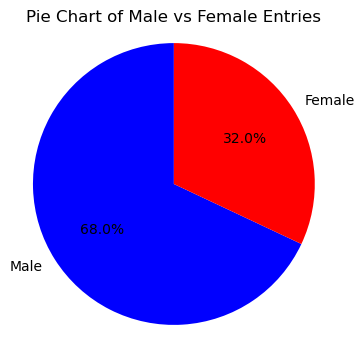

In [5]:
print((df['Gender'] == "Male").value_counts()[True], 'Men, ',
      (df['Gender'] == "Female").value_counts()[True], 'women.')
gendernums = df['Gender'].value_counts()
colors = ['blue' if gender == 'Male' else 'red' for gender in gendernums.index]
plt.figure(figsize=(4, 4))
plt.pie(gendernums, labels=gendernums.index, autopct='%1.1f%%', startangle=90, colors = colors)
plt.title('Pie Chart of Male vs Female Entries')
plt.axis('equal') 
plt.show()


Though there are far more Male shoppers represented in this data, it shouldn't be an issue while using min, max, and mean to analyze the data. We will later drop an amount of male entries to make the ratio 1:1, but for now this is not a problem.

<Axes: xlabel='Age'>

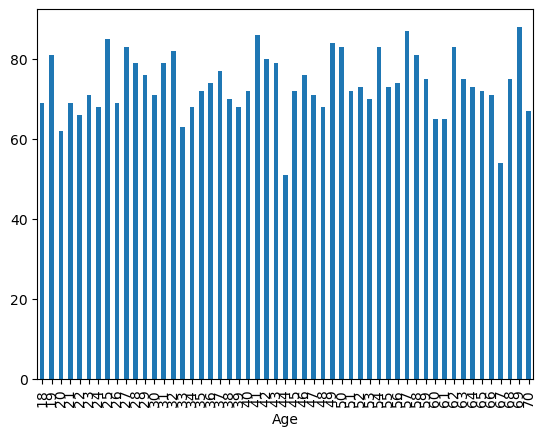

In [6]:
agenums = df['Age'].value_counts().sort_index()

agenums.plot(kind= 'bar')

This indicates that we have a fairly equal representation of all ages between 18 and 70.

First question: What item type had the highest average cost to purchase? does this change when grouped by gender?

In [10]:
print(df.groupby(['Item Purchased'])['Purchase Amount (USD)'].mean().idxmax(), 'had the highest average purchase cost overall.')
print(df.groupby(['Gender', 'Item Purchased'])['Purchase Amount (USD)'].mean().idxmax(), 'had the highest average purchase cost across all gender to item pairs.')

T-shirt had the highest average purchase cost overall.
('Female', 'Dress') had the highest average purchase cost across all gender to item pairs.


That seems odd. lets look at the spread of prices to make sense of that.

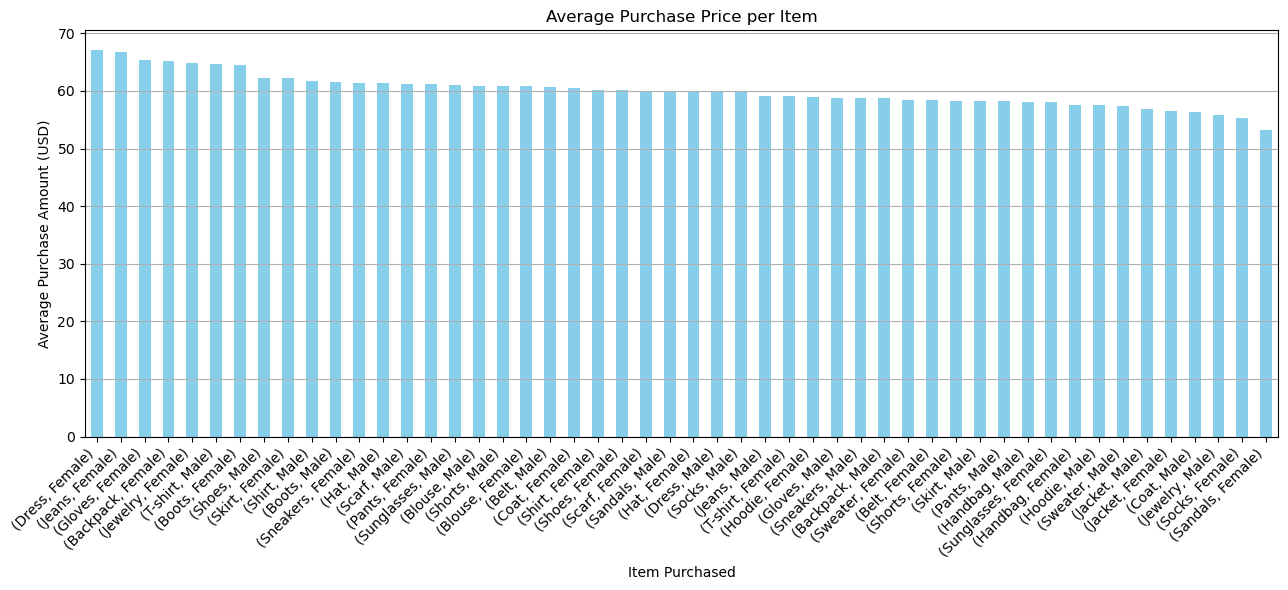

In [20]:
avg_prices = df.groupby(['Item Purchased', 'Gender'])['Purchase Amount (USD)'].mean().sort_values(ascending=False)

plt.figure(figsize=(13, 6))
avg_prices.plot(kind='bar', color=colors)
plt.title('Average Purchase Price per Item')
plt.xlabel('Item Purchased')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

To see five women's items as the highest average priced items made more intuitive sense to me than t-shirts. This still doesn't quite make sense, seeing as men's shirts are further down the list, when men make up the majority of the customers within this dataset.
After staring at this for a while, I went back to the data source and gathered that this is likely a luxury clothing store. A 65 dollar t-shirt is not a surprise within that context. Furthermore, Shirts are the most purchased item over 60$.

In [19]:
print('The most purchased item type over 60$ was', df[df['Purchase Amount (USD)'] > 60]['Item Purchased'].value_counts().idxmax())

The most purchased item type over 60$ was Shirt


**Shopper Analysis**

I wondered if there would be a notable change in purchasing habits between genders to do with seasons.

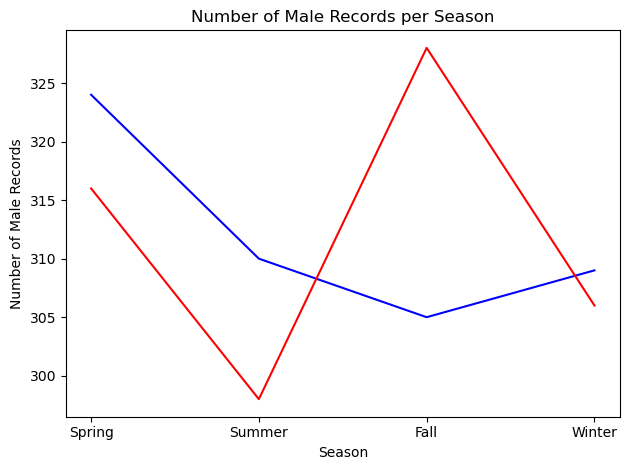

In [31]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

males = df[df['Gender'] == 'Male']
males = males.head(1248)
females = df[df['Gender'] == 'Female']
male_counts = males['Season'].value_counts().reindex(season_order, fill_value=0)
female_counts = females['Season'].value_counts().reindex(season_order, fill_value=0)

plt.plot(season_order, male_counts.values, color='blue')
plt.plot(season_order, female_counts.values, color='red')
plt.xlabel('Season')
plt.ylabel('Number of Male Records')
plt.title('Number of Male Records per Season')
plt.tight_layout()
plt.show()


We can see from the sine wave-shaped lines for both men and women that purchasing habits are influenced by season at this store.

In [38]:
#What's in the women's fall and summer sine wave
girlsummer = df[(df['Gender'] == 'Female') & (df['Season'] == 'Summer')]['Item Purchased'].value_counts().head(2)
girlfall = df[(df['Gender'] == 'Female') & (df['Season'] == 'Fall')]['Item Purchased'].value_counts().head(2)
print(f"Top 2 Purchases by Females in Summer:{girlsummer}")
print(f"\nTop 2 Purchases by Females in Fall:{girlfall}")

Top 2 Purchases by Females in Summer:Item Purchased
Blouse    18
Dress     17
Name: count, dtype: int64

Top 2 Purchases by Females in Fall:Item Purchased
Hat      22
Socks    22
Name: count, dtype: int64


In [52]:
spring = df[df['Season'] == 'Spring']['Item Purchased'].value_counts().idxmax()
summer = df[df['Season'] == 'Summer']['Item Purchased'].value_counts().idxmax()

print(f"Most common item in Spring is {spring}")
print(f"Most common item in Summer is {summer}")

Most common item in Spring is Sweater
Most common item in Summer is Pants


Next I wanted to see if there was any difference in ratings left by men vs women. I chose to do this by item because the mean rating over all items was the same for men and women.

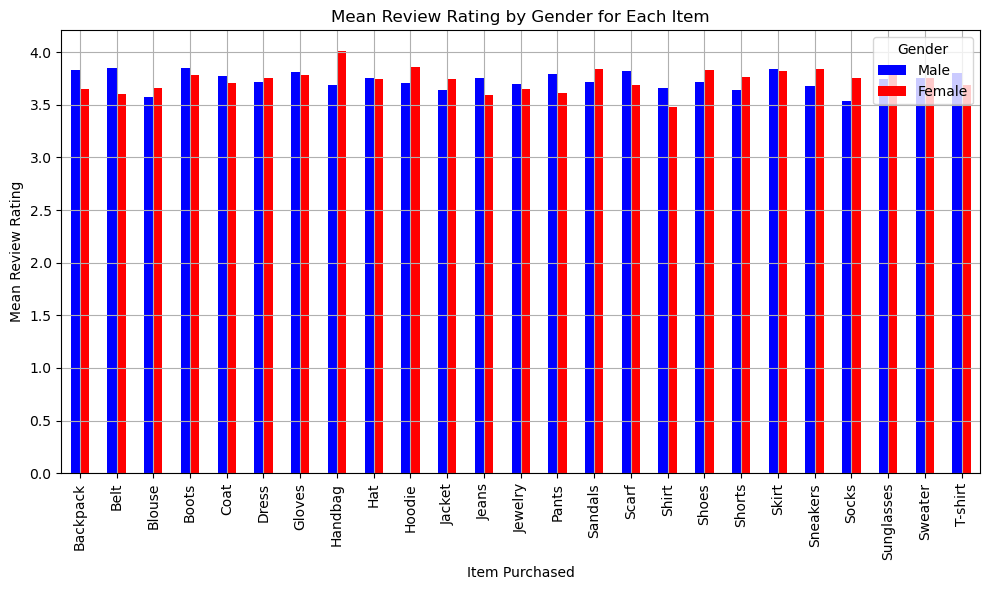

In [49]:
male_ratings = males.groupby('Item Purchased')['Review Rating'].mean()
female_ratings = females.groupby('Item Purchased')['Review Rating'].mean()

ratings_df = pd.DataFrame({'Male': male_ratings,'Female': female_ratings})

ratings_df.plot(kind='bar', figsize=(10, 6),color=['blue', 'red'])
plt.title('Mean Review Rating by Gender for Each Item')
plt.xlabel('Item Purchased')
plt.ylabel('Mean Review Rating')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()

Not to stereotype, but look at that. Women *do* like handbags.

My last analysis was to ask the question that inspired this project: Who buys the socks?

I implemented a smoothed rolling average so that the plot's trend was easier to see.

In [58]:
#First, we will have to make sure the ratio of male to female shoppers is even
males = df[df['Gender'] == "Male"]
females = df[df['Gender'] == "Female"]
males = males.head(1248)

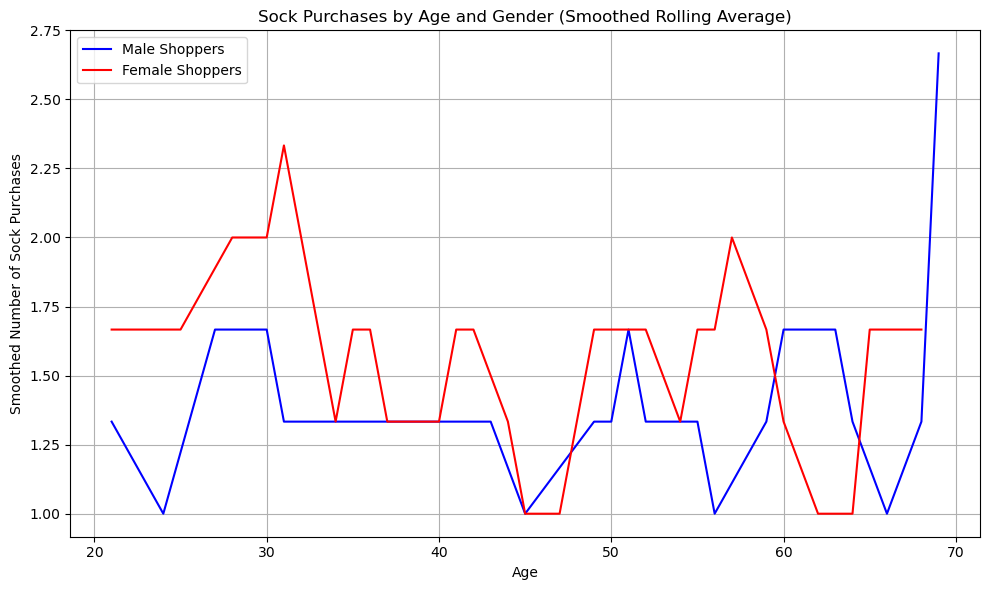

In [62]:
# From there we take only the purchases of socks made by men and women
male_socks = males[males['Item Purchased'].str.lower() == 'socks']
female_socks = females[females['Item Purchased'].str.lower() == 'socks']

# I grouped it by Age and counted the number of purchases
male_counts = male_socks.groupby('Age').size().reset_index(name='Purchase Count')
female_counts = female_socks.groupby('Age').size().reset_index(name='Purchase Count')

# Sort by age so that the plot's x index is sensible
male_counts = male_counts.sort_values('Age')
female_counts = female_counts.sort_values('Age')

window_size = 3  # this adjusts for more or less smoothing


male_counts = male_socks.groupby('Age').size().sort_index().rolling(window=window_size, center=True).mean()
female_counts = female_socks.groupby('Age').size().sort_index().rolling(window=window_size, center=True).mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(male_counts.index, male_counts.values, label='Male Shoppers', color='blue')
plt.plot(female_counts.index, female_counts.values, label='Female Shoppers', color='red')

plt.xlabel('Age')
plt.ylabel('Number of Sock Purchases')
plt.title('Sock Purchases by Age and Gender')
plt.legend()
plt.grid(True)
plt.tight_layout()


Just like we expected, around the normal ages of marriage and kids, women's sock purchasing habits quickly spike, then meet back with men's trends in the middle ages. I would've been able to draw on relationship sociology in a stronger manner had there been more variety of basic garments, but the trend still stands. 



References:

iamsouravbanerjee. (2023, November 4). *👔 Decoding Customer Shopping Trends👖*. Kaggle.com; Kaggle. https://www.kaggle.com/code/iamsouravbanerjee/decoding-customer-shopping-trends

Hoang, H., & Robins, C. (2018). *The kiss quotient*. Dreamscape Media, Llc.